In [6]:
# Cell 1: Setup iniziale e anonimizzazione (con fix finale pyarrow)

import pandas as pd
import uuid
import os

# Percorso al file Excel originale
file_path = "../data/raw/RM_Dimessi.xlsx"
df = pd.read_excel(file_path)

print("✅ Colonne caricate:", df.shape[1])

# Rimozione dati sensibili
sensitive_cols = ["Nome", "Cognome", "Codice fiscale", "Indirizzo", "Luogo di nascita", "Luogo di residenza"]
df = df.drop(columns=[col for col in sensitive_cols if col in df.columns], errors="ignore")

# Generazione pseudonimo per ogni paziente
df["patient_id"] = [str(uuid.uuid4()) for _ in range(len(df))]

# Salvataggio mapping se esiste 'codpaz'
secure_dir = "../secure_data"
os.makedirs(secure_dir, exist_ok=True)
if "codpaz" in df.columns:
    df[["patient_id", "codpaz"]].to_csv(f"{secure_dir}/patient_mapping.csv", index=False)
    df = df.drop(columns=["codpaz"], errors="ignore")

# 🔁 Conversione sicura per salvataggio parquet
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("string")

# Salvataggio in formato Parquet
output_path = "../data/processed/RM_Dimessi_clean.parquet"
df.to_parquet(output_path, index=False)

print(f"✅ Dataset anonimizzato e salvato in {output_path}")

✅ Colonne caricate: 140
✅ Dataset anonimizzato e salvato in ../data/processed/RM_Dimessi_clean.parquet


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_76993/231673032.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sesso', data=df, palette='pastel')


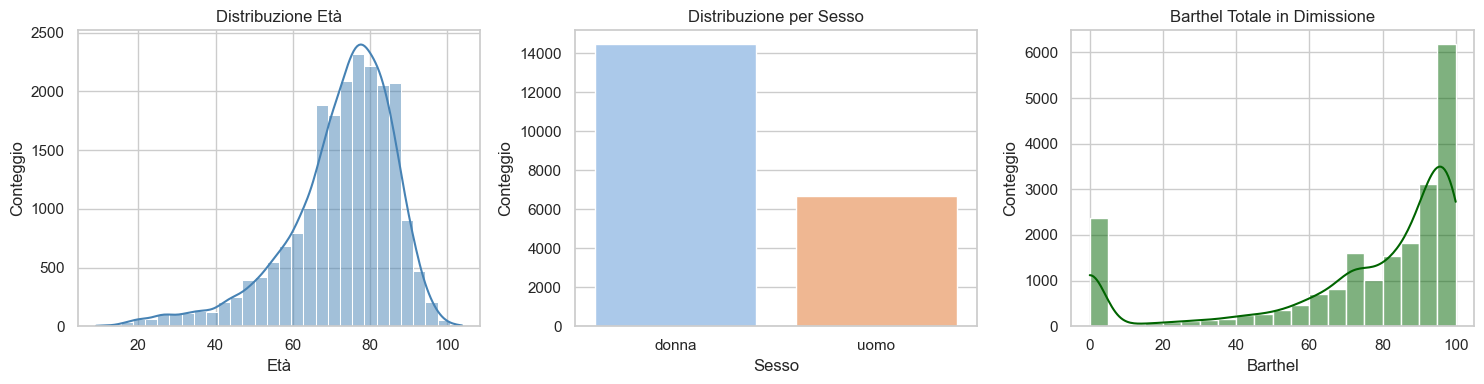

In [7]:
# Cell 3: Visualizzazione EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile
sns.set(style="whitegrid")
plt.figure(figsize=(15, 4))

# 1. Distribuzione età
if 'età del paziente dimesso' in df.columns:
    plt.subplot(1, 3, 1)
    sns.histplot(df['età del paziente dimesso'], bins=30, kde=True, color='steelblue')
    plt.title("Distribuzione Età")
    plt.xlabel("Età")
    plt.ylabel("Conteggio")

# 2. Distribuzione sesso
if 'sesso' in df.columns:
    plt.subplot(1, 3, 2)
    sns.countplot(x='sesso', data=df, palette='pastel')
    plt.title("Distribuzione per Sesso")
    plt.xlabel("Sesso")
    plt.ylabel("Conteggio")

# 3. Distribuzione Barthel totale in dimissione
barthel_cols = [col for col in df.columns if col.startswith("bartdim")]
if barthel_cols:
    df["barthel_tot_dim"] = df[barthel_cols].sum(axis=1, skipna=True)
    plt.subplot(1, 3, 3)
    sns.histplot(df["barthel_tot_dim"], bins=20, kde=True, color='darkgreen')
    plt.title("Barthel Totale in Dimissione")
    plt.xlabel("Barthel")
    plt.ylabel("Conteggio")

plt.tight_layout()
plt.show()